**Problem1-Leetcode#684. Redundant Connection-Medium**

You are given a connected undirected graph with n nodes labeled from 1 to n. Initially,
it contained no cycles and consisted of n-1 edges.

We have now added one additional edge to the graph. The edge has two
different vertices chosen from 1 to n, and was
not an edge that previously existed in the graph.

The graph is represented as an array edges of length n where
edges[i] = [ai, bi] represents an edge between nodes ai and bi in the graph.

Return an edge that can be removed so that the graph is still a
connected non-cyclical graph. If there are multiple answers,
return the edge that appears last in the input edges.

Example 1:

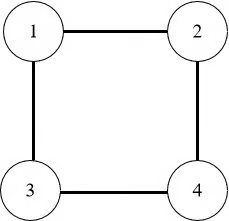

Input: edges = [[1,2],[1,3],[3,4],[2,4]]

Output: [2,4]


Example 2:

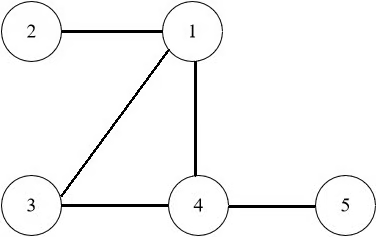

Input: edges = [[1,2],[1,3],[1,4],[3,4],[4,5]]

Output: [3,4]

Constraints:

- n == edges.length
- 3 <= n <= 100
- 1 <= edges[i][0] < edges[i][1] <= edges.length
- There are no repeated edges and no self-loops in the input.

In [ ]:
class UnionFind:
    def __init__(self, size):
        self.parent = list(range(size))
        self.rank = [0] * size

    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]

    def union(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)

        if rootX != rootY:
            if self.rank[rootX] > self.rank[rootY]:
                self.parent[rootY] = rootX
            elif self.rank[rootX] < self.rank[rootY]:
                self.parent[rootX] = rootY
            else:
                self.parent[rootY] = rootX
                self.rank[rootX] += 1
            return True
        else:
            return False

class Solution:
    def findRedundantConnection(self, edges: List[List[int]]) -> List[int]:
        n = len(edges)
        uf = UnionFind(n + 1)

        for edge in edges:
            if not uf.union(edge[0], edge[1]):
                return edge


**Problem2-Leetcode#684. Count connected Components-Medium**

There is an undirected graph with n nodes. There is also an edges array, where edges[i] = [a, b] means that there is an edge between node a and node b in the graph.

The nodes are numbered from 0 to n - 1.

Return the total number of connected components in that graph.

Example 1:

Input:
n=3
edges=[[0,1], [0,2]]

Output:
1
Example 2:

Input:
n=6
edges=[[0,1], [1,2], [2,3], [4,5]]

Output:
2
Constraints:

- 1 <= n <= 100
- 0 <= edges.length <= n * (n - 1) / 2


In [ ]:
class UnionFind:
    def __init__(self, size):
        self.parent = list(range(size))
        self.rank = [0] * size

    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]

    def union(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)

        if rootX != rootY:
            if self.rank[rootX] > self.rank[rootY]:
                self.parent[rootY] = rootX
            elif self.rank[rootX] < self.rank[rootY]:
                self.parent[rootX] = rootY
            else:
                self.parent[rootY] = rootX
                self.rank[rootX] += 1
            return True
        return False

class Solution:
    def countComponents(self, n: int, edges: List[List[int]]) -> int:
        uf = UnionFind(n)

        for a, b in edges:
            uf.union(a, b)

        unique_roots = set(uf.find(i) for i in range(n))

        return len(unique_roots)


**Problem3-Leetcode#207. Course Schedule-Medium**

There are a total of numCourses courses you have to take, labeled\
from 0 to numCourses - 1. You are given an array prerequisites where\
prerequisites[i] = [ai, bi] indicates that you must take course bi\
first if you want to take course ai.

For example, the pair [0, 1], indicates that to take course 0\
you have to first take course 1.
Return true if you can finish all courses. Otherwise, return false.

 

- Example 1:

    - Input: numCourses = 2, prerequisites = [[1,0]]
    - Output: true
    - Explanation: There are a total of 2 courses to take. 
      To take course 1 you should have finished course 0. So it is possible.
      
- Example 2:

    - Input: numCourses = 2, prerequisites = [[1,0],[0,1]]
    - Output: false
    - Explanation: There are a total of 2 courses to take. 
      To take course 1 you should have finished course 0,\
      and to take course 0 you should also have finished course 1.\
      So it is impossible.


In [ ]:
class Solution:
    def canFinish(self, numCourses: int, prerequisites: List[List[int]]) -> bool:
        def dfs(course, visit, adjList):
            if course in visit:
                return False
            if adjList[course] == []:
                return True

            visit.add(course)

            for neighbor in adjList[course]:
                if not dfs(neighbor, visit, adjList):
                    return False

            visit.remove(course)
            adjList[course] = []
            return True

        adjList = [[] for _ in range(numCourses)]
        for course, prereq in prerequisites:
            adjList[prereq].append(course)

        visit = set()

        for c in range(numCourses):
            if not dfs(c, visit, adjList):
                return False
        return True


**Problem4-Leetcode#210. Course Schedule II-Medium**

There are a total of numCourses courses you have to take,\
labeled from 0 to numCourses - 1. You are given an array prerequisites\
where prerequisites[i] = [ai, bi] indicates that you must take course\
bi first if you want to take course ai.

For example, the pair [0, 1], indicates that to take course 0 you have to first take course 1.
Return the ordering of courses you should take to finish all courses. If there\
are many valid answers, return any of them. If it is impossible to finish\
all courses, return an empty array.

 

- Example 1:

    - Input: numCourses = 2, prerequisites = [[1,0]]
    - Output: [0,1]
    - Explanation: There are a total of 2 courses to take.\
        To take course 1 you should have finished course 0. So the correct course order is [0,1].

- Example 2:

    - Input: numCourses = 4, prerequisites = [[1,0],[2,0],[3,1],[3,2]]
    - Output: [0,2,1,3]
    - Explanation: There are a total of 4 courses to take. To take course 3\
        you should have finished both courses 1 and 2. Both courses 1 and 2\
        should be taken after you finished course 0.
        So one correct course order is [0,1,2,3]. Another correct ordering is [0,2,1,3].

- Example 3:

    - Input: numCourses = 1, prerequisites = []
    - Output: [0]

In [ ]:
class Solution:
    def findOrder(self, numCourses: int, prerequisites: List[List[int]]) -> List[int]:
        graph = defaultdict(list)
        in_degree = [0] * numCourses

        for course, prereq in prerequisites:
            graph[prereq].append(course)
            in_degree[course] += 1

        queue = deque([i for i in range(numCourses) if in_degree[i] == 0])
        result = []

        while queue:
            course = queue.popleft()
            result.append(course)

            for neighbor in graph[course]:
                in_degree[neighbor] -= 1
                if in_degree[neighbor] == 0:
                    queue.append(neighbor)

        if len(result) == numCourses:
            return result
        else:
            return []


**Problem5-Leetcode#1462. Course Schedule IV-Medium**

There are a total of numCourses courses you have to take,\
labeled from 0 to numCourses - 1. You are given an array prerequisites\
where prerequisites[i] = [ai, bi] indicates that you must take course ai\
first if you want to take course bi.

For example, the pair [0, 1] indicates that you have to take course 0\
before you can take course 1.
Prerequisites can also be indirect. If course a is a prerequisite of course b,\
and course b is a prerequisite of course c, then course a is a prerequisite of course c.

You are also given an array queries where queries[j] = [uj, vj]. For the jth query,\
you should answer whether course uj is a prerequisite of course vj or not.

Return a boolean array answer, where answer[j] is the answer to the jth query.


- Example 1:

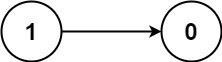

    - Input: numCourses = 2, prerequisites = [[1,0]], queries = [[0,1],[1,0]]
    - Output: [false,true]
    - Explanation: The pair [1, 0] indicates that you have to take course 1 before you can take course 0.
      Course 0 is not a prerequisite of course 1, but the opposite is true.

- Example 2:

    - Input: numCourses = 2, prerequisites = [], queries = [[1,0],[0,1]]
    - Output: [false,false]
    - Explanation: There are no prerequisites, and each course is independent.
    
- Example 3:  

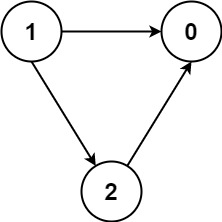

    - Input: numCourses = 3, prerequisites = [[1,2],[1,0],[2,0]], queries = [[1,0],[1,2]]
    - Output: [true,true]

- Constraints:

    - 2 <= numCourses <= 100
    - 0 <= prerequisites.length <= (numCourses * (numCourses - 1) / 2)
    - prerequisites[i].length == 2
    - 0 <= ai, bi <= n - 1
    - ai != bi
    - All the pairs [ai, bi] are unique.
    - The prerequisites graph has no cycles.
    - 1 <= queries.length <= 104
    - 0 <= ui, vi <= n - 1
    - ui != vi


In [ ]:
class Solution:
    def checkIfPrerequisite(self, numCourses: int, prerequisites: List[List[int]], queries: List[List[int]]) -> List[bool]:

        graph = [[] for _ in range(numCourses)]
        reachable = [[False] * numCourses for _ in range(numCourses)]

        for prereq, course in prerequisites:
            graph[prereq].append(course)

        def dfs(course):
            stack = [course]
            while stack:
                node = stack.pop()
                if not reachable[course][node]:
                    reachable[course][node] = True
                    for neighbor in graph[node]:
                        if not reachable[course][neighbor]:
                            stack.append(neighbor)

        for i in range(numCourses):
            dfs(i)

        result = []
        for u, v in queries:
            result.append(reachable[u][v])

        return result
